In [1]:
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit_aer import AerSimulator 
from qiskit.utils import QuantumInstance
from qubap.qiskit.luciano.costfunc_barren_plateaus import global2local, test_hamiltonian_2, VQE_shift, paulistrings2hamiltonian 
from qubap.qiskit.luciano.variational_algorithms import VQE, energy_evaluation, classical_solver

In [27]:
molecule = np.load( 'molecule_BeH2_6.npy', allow_pickle=True )[0]
pauli_strings, coeffs = molecule['hamiltonian']
hamiltonian = paulistrings2hamiltonian( pauli_strings, coeffs )
num_qubits = hamiltonian.num_qubits

In [29]:
exact_energy = classical_solver( hamiltonian ).eigenvalue
exact_energy

-3.9111731691821907

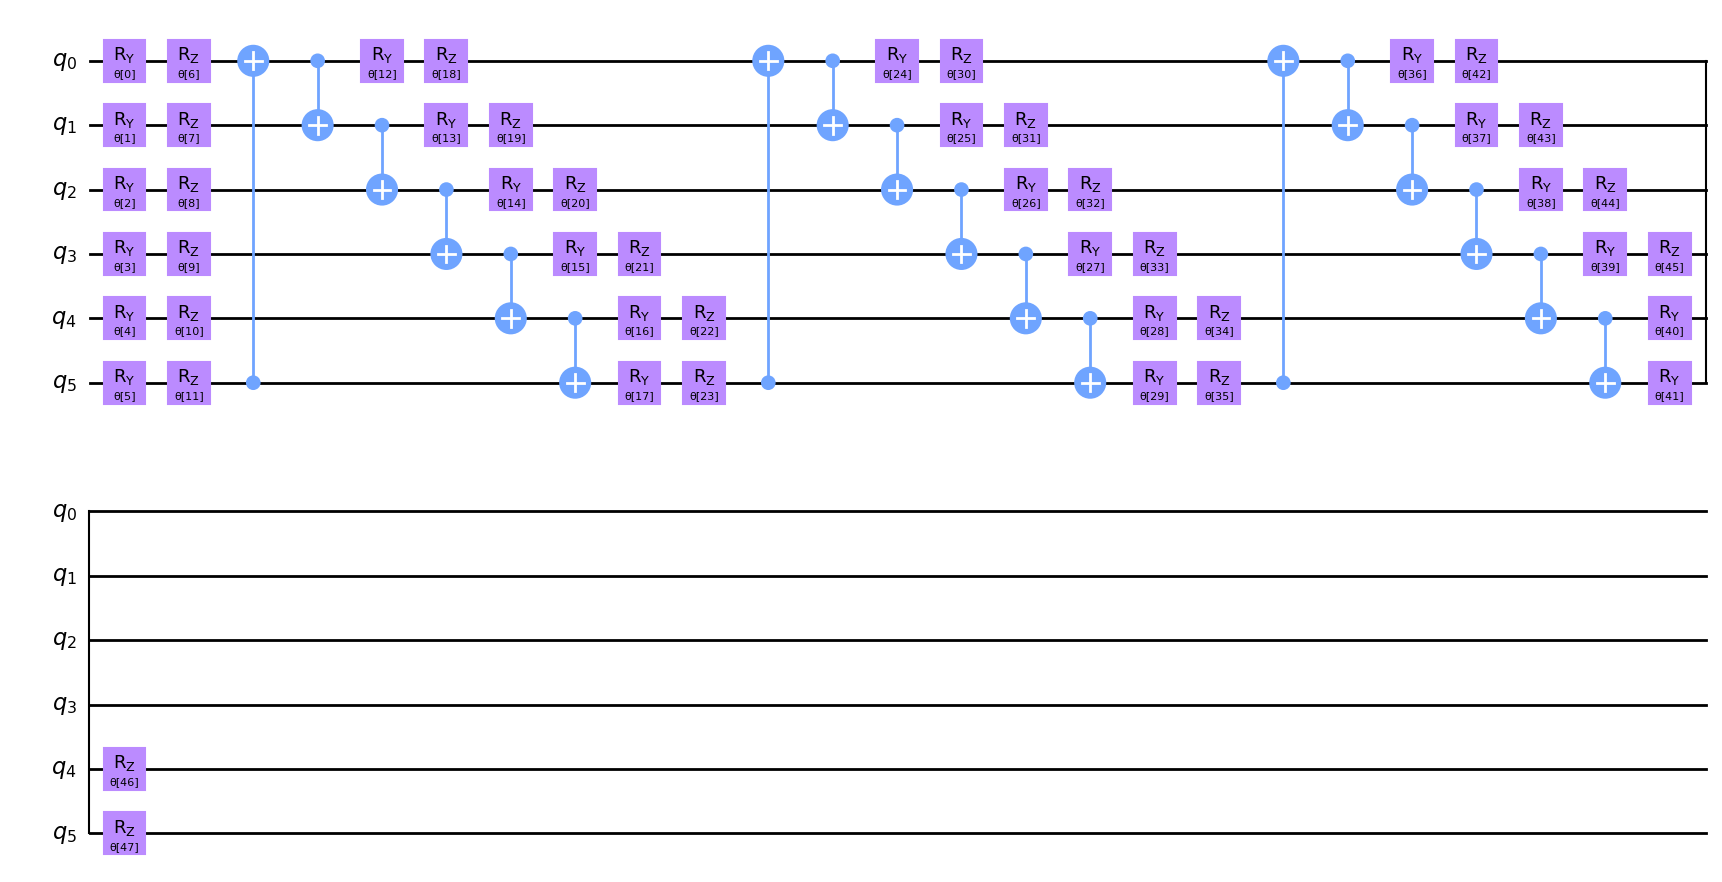

In [8]:
reps   = 3
ansatz = EfficientSU2( num_qubits, ['ry','rz'], 'circular', reps ).decompose()
# ansatz.draw('mpl') 

In [14]:
num_iters = 10
npars = ansatz.num_parameters
pars  = np.random.randn( npars ) * np.pi
quantum_instance = QuantumInstance( AerSimulator() , shots = 2**4 )

In [18]:
results_global = VQE( hamiltonian, ansatz, pars, num_iters, quantum_instance )
data_global    = [ energy_evaluation( hamiltonian, ansatz, x, AerSimulator(method='statevector') ) for x in results_global['x'] ]

In [24]:
results_shift = VQE_shift( hamiltonian, ansatz, pars, num_iters, num_iters//3, quantum_instance ) 
data_shift    = [ energy_evaluation( hamiltonian, ansatz, x, AerSimulator(method='statevector') ) for x in results_shift ] 

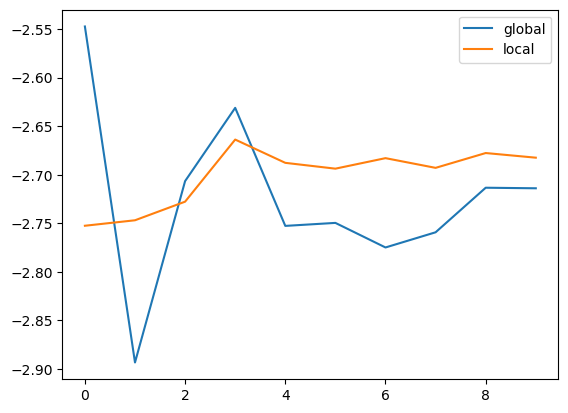

In [26]:
plt.plot( data_global )
plt.plot( data_shift )
plt.legend(['global','local'])